In [1]:
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

<h3 style="color:orange">Hyperparmeter</h3>

In [2]:
weight_dir="./weights/license_plate_detector_YOLO.pt"

model=YOLO('./weights/license_plate_detector_YOLO.pt').to("cuda")

image_url=["../dataset/images/test1.jpg","../code/output/images/out_car-wbs-CH01AN0001_00000.png"]

print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

(290, 435, 3)


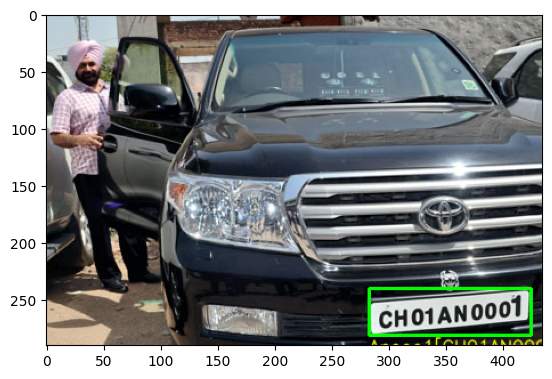

In [3]:
img=cv2.imread(image_url[1])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img,cmap="gray")

In [4]:
pred=model(img)
# print(pred)

pred=pred[0]
# print(len(pred))
# print(pred)
# print(pred.boxes)
# print(pred.boxes.data)
print(pred.boxes.data.tolist())


0: 448x640 3 License_Plates, 733.1ms
Speed: 31.1ms preprocess, 733.1ms inference, 576.5ms postprocess per image at shape (1, 3, 448, 640)
[[278.2480163574219, 233.5128173828125, 423.6949768066406, 284.6829528808594, 0.7446893453598022, 0.0], [134.8600311279297, 247.90194702148438, 204.69894409179688, 280.97100830078125, 0.645238995552063, 0.0], [0.5313714742660522, 157.52890014648438, 8.938310623168945, 197.6746826171875, 0.25592273473739624, 0.0]]


0.7446893453598022
0.645238995552063


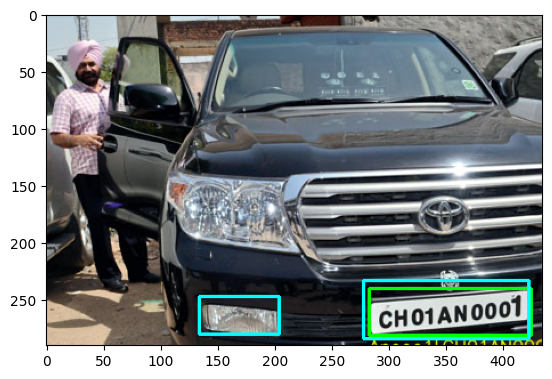

In [5]:
detection=[]
for x in pred.boxes.data.tolist():
    x1,y1,x2,y2,score,classes=x
    if(score>=0.6):
        detection.append([x1,y1,x2,y2,score])

# print(len(detection))

for x1,y1,x2,y2,score in detection:
    print(score)
    cv2.rectangle(img,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,255),2)

plt.imshow(img,cmap="gray")